In [1]:
import os
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.metrics import jaccard_score
import sys
import os
sys.path.append('../src')
import torch
import torchvision
import ds_utils
from patch_ablation_utils import PatchMaster, SuperPixelPatchMaster


In [2]:
dataset = ds_utils.ImageNetMegaDS(factor=5)


length of DS 10000


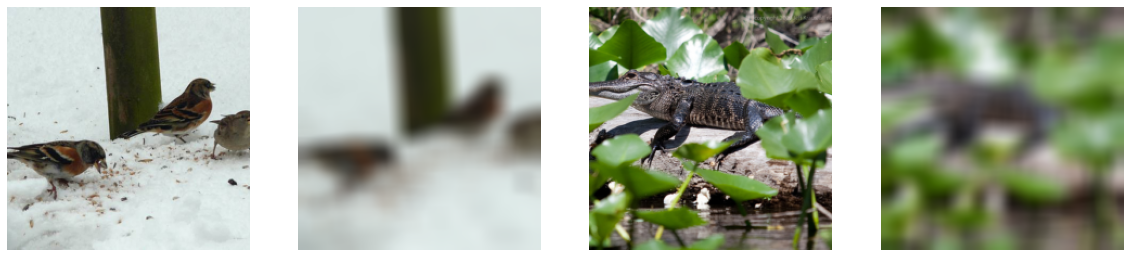

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
img = torchvision.transforms.ToPILImage()(dataset[106]['image'])
ax[0].imshow(img)
blur = torchvision.transforms.GaussianBlur(kernel_size=21, sigma=10)(img)
ax[1].imshow(blur)

img = torchvision.transforms.ToPILImage()(dataset[500]['image'])
ax[2].imshow(img)
blur = torchvision.transforms.GaussianBlur(kernel_size=21, sigma=10)(img)
ax[3].imshow(blur)

for i in range(4):
    ax[i].axis(False)
fig.savefig("blur_examples.pdf")
plt.show()

In [8]:
import numpy as np


In [9]:
superpixels = np.load("/mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/saliency_maps/slic_superpixel.npy")

In [10]:
superpixels[0]

array([[  0,   0,   0, ...,  10,  10,  10],
       [  0,   0,   0, ...,  10,  10,  10],
       [  0,   0,   0, ...,  10,  10,  10],
       ...,
       [133, 133, 133, ..., 129, 129, 129],
       [133, 133, 133, ..., 129, 129, 129],
       [133, 133, 133, ..., 129, 129, 129]])

In [14]:
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float


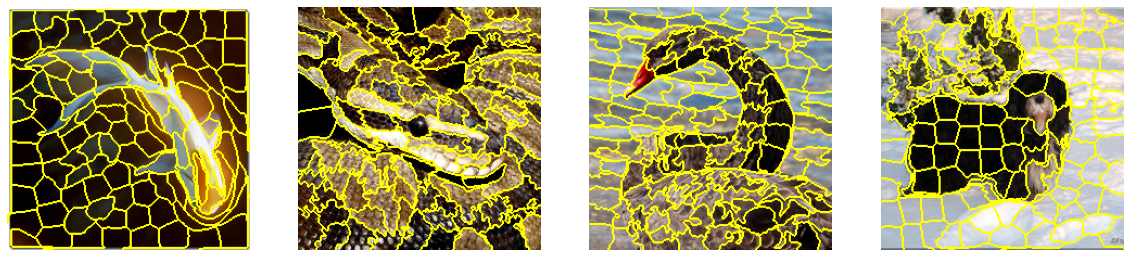

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, b in enumerate([10, 600, 1000, 2000]):
    img = torchvision.transforms.ToPILImage()(dataset[b]['image'])
    ax[i].imshow(mark_boundaries(img_as_float(img), superpixels[b]))
    ax[i].axis(False)
fig.savefig('superpixel_example.pdf')
plt.show()

In [18]:
img

ToPILImage(mode=[[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843 1.        ]
  [0.99607843 0.99607843 0.99215686 ... 0.99215686 0.99607843 0.99607843]
  [0.99607843 0.99215686 0.8745098  ... 0.8627451  0.9764706  0.99215686]
  ...
  [0.9882353  0.9882353  0.85882354 ... 0.23137255 0.46666667 0.7490196 ]
  [0.99215686 0.99215686 0.972549   ... 0.41568628 0.5803922  0.8       ]
  [0.99607843 0.99607843 0.98039216 ... 0.6666667  0.76862746 0.8901961 ]]

 [[0.99607843 0.99607843 0.99607843 ... 0.99215686 0.99215686 0.99607843]
  [0.99607843 0.99607843 0.99215686 ... 0.9882353  0.99607843 0.99607843]
  [0.99607843 0.99215686 0.8745098  ... 0.8627451  0.98039216 0.99607843]
  ...
  [0.9882353  0.9882353  0.8509804  ... 0.23137255 0.47058824 0.7490196 ]
  [0.99215686 0.99215686 0.972549   ... 0.41568628 0.58431375 0.8       ]
  [1.         0.99607843 0.9843137  ... 0.6666667  0.76862746 0.8901961 ]]

 [[0.99607843 0.99607843 0.99607843 ... 0.9843137  0.9882353  0.99607843]
  [0.9